In [1]:
from pydub import AudioSegment
import os
import glob
sound_path = "C:/Users/PC06/Desktop/語音進度/pikachu training/first_train/pika"
os.chdir(sound_path)

In [2]:
#讀取
sound = AudioSegment.from_file("./Conversations with Leonardo DiCaprio.mp3", "mp3")
sound1 = AudioSegment.from_file("./Conversations with Leonardo DiCaprio_1.mp3", "mp3")

In [3]:
# 切分為左右聲道 左0 右1
sounds = sound.split_to_mono()
sounds[1]

In [4]:
#合併兩個音檔成多聲道
stereo_sound = AudioSegment.from_mono_audiosegments(sounds[0], sounds[1])
stereo_sound

In [5]:
# 分貝數
loudness = sound.dBFS
loudness

-32.61309142021474

In [6]:
# 音量大小
loudness = sound.rms
loudness

767

In [7]:
# 幾個聲道
channel_count = sound.channels
channel_count

2

In [8]:
# 音頻採樣寬度
bytes_per_sample = sound.sample_width
bytes_per_sample

2

In [9]:
# 採樣頻率
frame_per_second = sound.frame_rate
frame_per_second

44100

In [10]:
normalizer_sound = sound.apply_gain(-sound.max_dBFS)
normalizer_sound

In [11]:
# 音頻時間
sound.duration_seconds

25.782857142857143

In [12]:
# # 取得音頻數據
# raw_audio_data = sound.raw_data
# raw_audio_data

In [13]:
number_of_frames_in_sound = sound.frame_count()
number_of_frames_in_200ms_of_sound  = sound.frame_count(ms=200)
print(number_of_frames_in_sound)
print(number_of_frames_in_200ms_of_sound)

1137024.0
8820.0


In [14]:
# 拼接sound1与sound2，返回一个新的AudioSegment实例
# cossfade：交叉渐变间隔 ms
no_crossfade1 = sound.append(sound1, crossfade=5000)
print(no_crossfade1)
no_crossfade1.export(r'cc.wav',format='wav') # 输出

<_io.BufferedRandom name='cc.wav'>

In [15]:
data_path = glob.glob("Z:/虛擬會議室/意軒/語音進度/lili colins/1/*")
data_path

['Z:/虛擬會議室/意軒/語音進度/lili colins/1\\Lily Collins Discusses Filming Tolkien and Ted Bundy Biopic This Morning.wav',
 'Z:/虛擬會議室/意軒/語音進度/lili colins/1\\Lily Collins Discusses Filming Tolkien and Ted Bundy Biopic This Morning_1.wav',
 'Z:/虛擬會議室/意軒/語音進度/lili colins/1\\Lily Collins Discusses Filming Tolkien and Ted Bundy Biopic This Morning_10.wav',
 'Z:/虛擬會議室/意軒/語音進度/lili colins/1\\Lily Collins Discusses Filming Tolkien and Ted Bundy Biopic This Morning_11.wav',
 'Z:/虛擬會議室/意軒/語音進度/lili colins/1\\Lily Collins Discusses Filming Tolkien and Ted Bundy Biopic This Morning_12.wav',
 'Z:/虛擬會議室/意軒/語音進度/lili colins/1\\Lily Collins Discusses Filming Tolkien and Ted Bundy Biopic This Morning_13.wav',
 'Z:/虛擬會議室/意軒/語音進度/lili colins/1\\Lily Collins Discusses Filming Tolkien and Ted Bundy Biopic This Morning_2.wav',
 'Z:/虛擬會議室/意軒/語音進度/lili colins/1\\Lily Collins Discusses Filming Tolkien and Ted Bundy Biopic This Morning_3.wav',
 'Z:/虛擬會議室/意軒/語音進度/lili colins/1\\Lily Collins Discusses Filming Tolkien and T

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
file = data_path[0]
y, sr = librosa.load(file, duration=120)
S_full, phase = librosa.magphase(librosa.stft(y))

c:\users\pc06\appdata\local\programs\python\python37\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\pc06\appdata\local\programs\python\python37\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\pc06\appdata\local\programs\python\python37\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


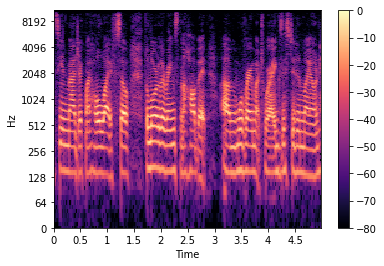

In [17]:
idx = slice(*librosa.time_to_frames([10, 15], sr=sr))
fig, ax = plt.subplots()
# print(fig)
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax)
# img
fig.colorbar(img, ax=ax)

In [18]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)

In [19]:
# We can also use a margin to reduce bleed between the vocals and instrumentation masks.
# Note: the margins need not be equal for foreground and background separation
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components
### 特徵向量 ###
S_foreground = mask_v * S_full
S_background = mask_i * S_full
S_foreground.shape

(1025, 787)

AxesSubplot(0.125,0.391471;0.775x0.222059)


c:\users\pc06\appdata\local\programs\python\python37\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\pc06\appdata\local\programs\python\python37\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
c:\users\pc06\appdata\local\programs\python\python37\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


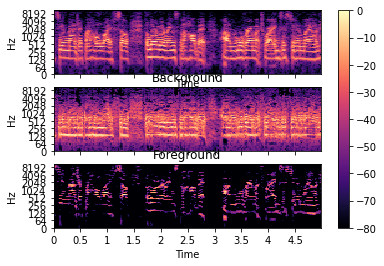

In [21]:
# sphinx_gallery_thumbnail_number = 2
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[0])
print(ax[1])
librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title='Background')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr, ax=ax[2])
ax[2].set(title='Foreground')
fig.colorbar(img, ax=ax)

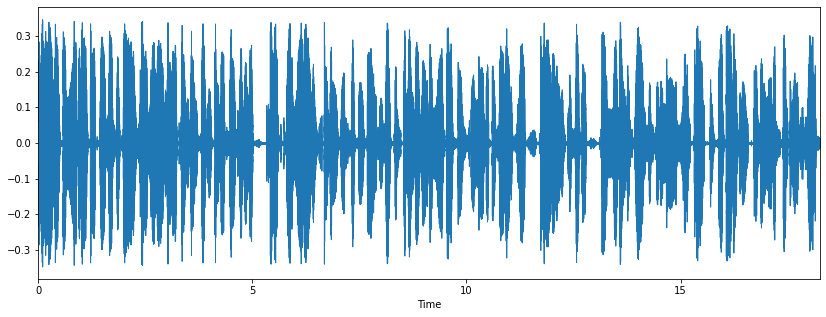

In [36]:
x, sr = librosa.load(data_path[0])
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x,sr = sr)

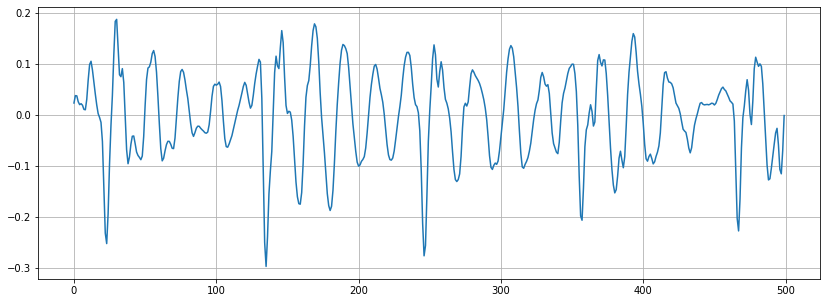

In [39]:
n0 = 9000
n1 = 9500
plt.figure(figsize = (14,5))
plt.plot(x[n0:n1])
plt.grid()